### NYC Green Taxi Case Study

Exploring data on New York City Green Taxi of May and June of 2018. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os, json, requests, pickle
from scipy.stats import skew
from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
#import scipy.stats as st
from sklearn.preprocessing import normalize, scale
from tabulate import tabulate #pretty print of tables. source: http://txt.arboreus.com/2013/03/13/pretty-print-tables-in-python.html
from shapely.geometry import Point,Polygon,MultiPoint
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import glob
import pandas as pd
os.chdir(r"F:\Data Set\Datasets for Case study")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')'

In [2]:
data = pd.read_csv(r'F:\Data Set\Datasets for Case study\combined_csv.csv')

In [3]:
# Print the size of the dataset
print ("Number of rows:", data.shape[0])
print ("Number of columns: ", data.shape[1])

Number of rows: 1536606
Number of columns:  19


In [4]:
# 5 point summary 
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,0.0,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06
mean,1.836116e+00,1.064452e+00,1.112909e+02,1.292130e+02,1.358079e+00,3.259950e+00,1.382517e+01,3.276253e-01,4.891488e-01,1.025544e+00,1.825947e-01,NaN,2.937648e-01,1.617187e+01,1.443950e+00,1.015524e+00
std,3.701703e-01,4.929179e-01,7.431200e+01,7.676230e+01,1.041068e+00,3.729108e+00,1.262898e+01,3.992615e-01,8.078239e-02,2.065636e+00,1.232885e+00,NaN,4.766457e-02,1.372031e+01,5.212163e-01,1.236238e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.350000e+02,-4.500000e+00,-5.000000e-01,-2.000000e+00,-6.000000e+00,NaN,-3.000000e-01,-2.350000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,5.100000e+01,6.200000e+01,1.000000e+00,1.090000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.300000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.960000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.180000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.920000e+00,1.650000e+01,5.000000e-01,5.000000e-01,1.700000e+00,0.000000e+00,NaN,3.000000e-01,1.930000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,6.211000e+02,2.703000e+03,4.500000e+00,5.000000e-01,4.500000e+02,7.650600e+02,NaN,3.000000e-01,2.704800e+03,5.000000e+00,2.000000e+00


In [5]:
# Dropping column ehail_fee as the attribute contains no data 
data.drop('ehail_fee', inplace=True, axis=1)

In [6]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-05-01 00:43:55,2018-05-01 00:56:23,N,1,80,189,5,3.67,13.5,0.5,0.5,4.44,0.0,0.3,19.24,1,1
1,2,2018-05-01 00:40:45,2018-05-01 00:45:40,N,1,97,49,1,1.14,5.5,0.5,0.5,1.36,0.0,0.3,8.16,1,1
2,1,2018-05-01 00:14:55,2018-05-01 00:22:46,N,1,7,179,1,1.50,7.5,0.5,0.5,0.00,0.0,0.3,8.80,1,1
3,1,2018-05-01 00:30:28,2018-05-01 00:47:48,N,1,7,173,1,3.60,15.0,0.5,0.5,0.00,0.0,0.3,16.30,2,1
4,1,2018-05-01 00:25:56,2018-05-01 00:45:07,N,1,256,186,1,5.40,19.0,0.5,0.5,2.00,0.0,0.3,22.30,1,1


In [7]:
#Discriptive Analysis

from pandas_profiling import ProfileReport
profile = ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Distribution of trip distance Analysis

In [ ]:
# defining the figure with 2 subplots
fig,ax = plt.subplots(1,2,figsize = (15,4)) 

# histogram of the number of trip distance
data.trip_distance.hist(bins=30,ax=ax[0])
ax[0].set_xlabel('Trip Distance (in miles)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log') 
ax[0].set_title('Histogram of Trip Distance with outliers included')

# create a variable containing Trip Distance
v = data.trip_distance 
# exclude any data point located further than 3 standard deviations of the median point and 
# plot the histogram with 30 bins
v[~((v-v.median()).abs()>3*v.std())].hist(bins=30,ax=ax[1]) # 
ax[1].set_xlabel('Trip Distance (miles)')
ax[1].set_ylabel('Count')
ax[1].set_title('A. Histogram of Trip Distance (without outliers)')

# apply a lognormal fit. Use the mean of trip distance as the scale parameter
scatter,loc,mean = lognorm.fit(data.trip_distance.values,
                               scale=data.trip_distance.mean(),
                               loc=0)
pdf_fitted = lognorm.pdf(np.arange(0,12,.1),scatter,loc,mean)
ax[1].plot(np.arange(0,12,.1),600000*pdf_fitted,'r') 
ax[1].legend(['data','lognormal fit'])

# export the figure
#plt.savefig('Question2.jpeg',format='jpeg')
#plt.show()

The Trip Distance is asymmetrically distributed. It is skewed to the right and it has a median smaller than its mean and both smaller than the standard deviation. The skewness is due to the fact that the variable has a lower boundary of 0. The distance can't be negative. This distribution has a structure of a lognormal distribution. To the left is plotted the distribution of the entire raw set of Trip distance. To the right, outliers have been removed before plotting. Outliers are defined as any point located further than 3 standard deviations from the mean

##### The hypothesis: The trips are not random. If there were random, we would have a (symmetric) Gaussian distribution. The non-zero autocorrelation may be related the fact that people taking ride are pushed by a common cause, for instance, people rushing to work.

### Let's see if the time of the day has any impact on the trip distance

In [ ]:
# First, convert pickup and drop off datetime variable in their specific righ format
data['Pickup_dt'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data['Dropoff_dt'] = data.lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

# Second, create a variable for pickup hours
data['Pickup_hour'] = data.Pickup_dt.apply(lambda x:x.hour)

# Mean and Median of trip distance by pickup hour
# I will generate the table but also generate a plot for a better visualization

fig,ax = plt.subplots(1,1,figsize=(9,5)) # prepare fig to plot mean and median values
# use a pivot table to aggregate Trip_distance by hour
table1 = data.pivot_table(index='Pickup_hour', values='trip_distance',aggfunc=('mean','median')).reset_index()
# rename columns
table1.columns = ['Hour','Mean_distance','Median_distance']
table1[['Mean_distance','Median_distance']].plot(ax=ax)
plt.ylabel('Metric (miles)')
plt.xlabel('Hours after midnight')
plt.title('Distribution of trip distance by pickup hour')
#plt.xticks(np.arange(0,30,6)+0.35,range(0,30,6))
plt.xlim([0,23])
plt.savefig('Question3_1.jpeg',format='jpeg')
plt.show()
print ('-----Trip distance by hour of the day-----\n')
print (tabulate(table1.values.tolist(),["Hour","Mean distance","Median distance"]))


We observe long range trips in the morning and evenings. Are these people commuting to work? If so how do they get back home. The evening peak are shorter than the morning peak. I would hypothesize that people are okay to take cabs in the morning to avoid being late to their early appointments while they would take public transportation in the evening. However, this might not apply to NYC

#### Let's also compare trips that originate (or terminate) from (at) one of the NYC airports. We can look at how many they are, the average fair, ...

Reading through the dictionary of variables, I found that the variable RateCodeID contains values indicating the final rate that was applied. Among those values, I realized that there is Newark and JFK which are the major airports in New York. In this part, I will use this knowledge and group data with RateCodeID 2 (JFK) and 3 (Newark). - An alternative (which I didn't due to time constraint) is to (1) get coordinates of airports from google map or http://transtats.bts.gov (2) get at least 4 points defining a rectangular buffer zone near the airport (3) build a polygon shape using shapely [https://pypi.python.org/pypi/Shapely] and (3) check if any pickup/dropoff location coordinates is within the polygon using shapely again. This method was first tried but was found to be time consuming -

In [ ]:
# select airport trips
airports_trips = data[(data.RatecodeID==2) | (data.RatecodeID==3)]
print ("Number of trips to/from NYC airports: ", airports_trips.shape[0])
print( "Average fare (calculated by the meter) of trips to/from NYC airports: $", airports_trips.fare_amount.mean(),"per trip")
print ("Average total charged amount (before tip) of trips to/from NYC airports: $", airports_trips.total_amount.mean(),"per trip")

#### In addition to the number and mean fare of airport trips, let's have aso look at how trips are distributed by trip distances and hour of the day

In [ ]:
# create a vector to contain Trip Distance for
v2 = airports_trips.trip_distance # airport trips
v3 = data.loc[~data.index.isin(v2.index),'trip_distance'] # non-airport trips

# remove outliers: 
# exclude any data point located further than 3 standard deviations of the median point and 
# plot the histogram with 30 bins
v2 = v2[~((v2-v2.median()).abs()>3*v2.std())]
v3 = v3[~((v3-v3.median()).abs()>3*v3.std())] 

# define bins boundaries
bins = np.histogram(v2,normed=True)[1]
h2 = np.histogram(v2,bins=bins,normed=True)
h3 = np.histogram(v3,bins=bins,normed=True)

# plot distributions of trip distance normalized among groups
fig,ax = plt.subplots(1,2,figsize = (15,4))
w = .4*(bins[1]-bins[0])
ax[0].bar(bins[:-1],h2[0],alpha=1,width=w,color='b')
ax[0].bar(bins[:-1]+w,h3[0],alpha=1,width=w,color='g')
ax[0].legend(['Airport trips','Non-airport trips'],loc='best',title='group')
ax[0].set_xlabel('Trip distance (miles)')
ax[0].set_ylabel('Group normalized trips count')
ax[0].set_title('A. Trip distance distribution')
#ax[0].set_yscale('log')

# plot hourly distribution
airports_trips.Pickup_hour.value_counts(normalize=True).sort_index().plot(ax=ax[1])
data.loc[~data.index.isin(v2.index),'Pickup_hour'].value_counts(normalize=True).sort_index().plot(ax=ax[1])
ax[1].set_xlabel('Hours after midnight')
ax[1].set_ylabel('Group normalized trips count')
ax[1].set_title('B. Hourly distribution of trips')
ax[1].legend(['Airport trips','Non-airport trips'],loc='best',title='group')
plt.savefig('Question3_2.jpeg',format='jpeg')
plt.show()


A. The trip distance distribution shows two peaks. Airport trips follow the same trend as the rest of the trips for short trips (trip distance ≤ 2miles). However, there is also an increased number of long range trips (18 miles) which might correspond to a great number people coming to airports from further residential areas. A check on google map shows that the distance between JFK and Manhattan is about 18 miles whereas Newark to Manhattan is 15 miles.

B. The hourly distribution shows that the number of trips at airports peaks around 3PM while it peaks 2 hours later. On the other hand, there is a shortage in airports riders at 2AM while the rest of NYC goes completely down 3 hours later 5AM.

In [8]:
data.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
VendorID,1.000000,-0.020660,0.000595,-0.001544,0.084335,0.045493,0.051474,-0.016925,-0.000633,-0.062041,0.018863,-0.000431,0.040141,-0.077860,-0.016564
RatecodeID,-0.020660,1.000000,0.055260,0.023570,-0.004378,0.040965,0.088505,-0.092636,-0.724335,0.025144,0.033570,-0.709302,0.078650,0.041199,0.917973
PULocationID,0.000595,0.055260,1.000000,0.134096,0.011958,0.063972,0.054294,0.013314,-0.046473,0.017888,0.027434,-0.045001,0.055193,-0.017177,0.053396
DOLocationID,-0.001544,0.023570,0.134096,1.000000,0.006329,0.067887,0.062883,-0.009203,-0.010213,0.068876,0.020618,-0.010968,0.069760,-0.038016,0.018891
passenger_count,0.084335,-0.004378,0.011958,0.006329,1.000000,0.003632,0.006535,0.005526,0.004903,0.000211,0.004525,0.004737,0.006827,-0.002897,-0.006243
trip_distance,0.045493,0.040965,0.063972,0.067887,0.003632,1.000000,0.862159,-0.050859,0.011925,0.230805,0.394533,0.020413,0.863079,-0.211730,0.007052
fare_amount,0.051474,0.088505,0.054294,0.062883,0.006535,0.862159,1.000000,-0.046279,0.000091,0.219733,0.343204,0.012112,0.983691,-0.217771,0.047508
extra,-0.016925,-0.092636,0.013314,-0.009203,0.005526,-0.050859,-0.046279,1.000000,0.129182,0.034763,-0.018795,0.128611,-0.009000,0.013150,-0.096687
mta_tax,-0.000633,-0.724335,-0.046473,-0.010213,0.004903,0.011925,0.000091,0.129182,1.000000,0.009330,-0.015711,0.979102,0.013383,-0.143504,-0.758539
tip_amount,-0.062041,0.025144,0.017888,0.068876,0.000211,0.230805,0.219733,0.034763,0.009330,1.000000,0.123801,0.018223,0.367246,-0.422835,-0.001524


In [9]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-05-01 00:43:55,2018-05-01 00:56:23,N,1,80,189,5,3.67,13.5,0.5,0.5,4.44,0.0,0.3,19.24,1,1
1,2,2018-05-01 00:40:45,2018-05-01 00:45:40,N,1,97,49,1,1.14,5.5,0.5,0.5,1.36,0.0,0.3,8.16,1,1
2,1,2018-05-01 00:14:55,2018-05-01 00:22:46,N,1,7,179,1,1.50,7.5,0.5,0.5,0.00,0.0,0.3,8.80,1,1
3,1,2018-05-01 00:30:28,2018-05-01 00:47:48,N,1,7,173,1,3.60,15.0,0.5,0.5,0.00,0.0,0.3,16.30,2,1
4,1,2018-05-01 00:25:56,2018-05-01 00:45:07,N,1,256,186,1,5.40,19.0,0.5,0.5,2.00,0.0,0.3,22.30,1,1


#### Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

Missing Data We can use seaborn to create a simple heatmap to see where we are missing data!

In [10]:
data.isnull()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536601,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1536602,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1536603,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1536604,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().mean()

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
dtype: float64

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
#Treating missing values with mean
data.fillna(data.mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='trip_type', ylabel='count'>

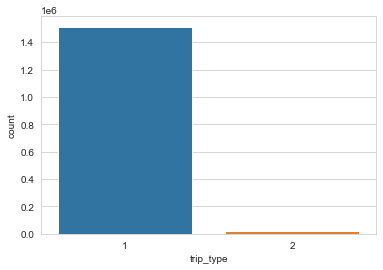

In [12]:
sns.set_style("whitegrid")
sns.countplot(x='trip_type',data=data)

In [13]:
data.dtypes


VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                  int64
dtype: object

In [14]:
data['pickup_datetime']=pd.to_datetime(data['lpep_pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['lpep_dropoff_datetime'])    


In [17]:
data['lpep_pickup_datetime'].value_counts()

2018-06-17 15:15:08    11
2018-06-16 15:15:43     8
2018-05-24 17:38:41     7
2018-05-08 09:01:07     6
2018-05-16 18:55:41     6
                       ..
2018-05-22 13:49:18     1
2018-05-22 13:16:13     1
2018-05-22 13:30:51     1
2018-05-22 13:15:06     1
2018-06-30 23:59:25     1
Name: lpep_pickup_datetime, Length: 1287475, dtype: int64

In [18]:

sns.set_style("whitegrid")
sns.countplot(x=data['pickup_datetime'],data=data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
data.dtypes

In [19]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

In [20]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day
0,2,2018-05-01 00:43:55,2018-05-01 00:56:23,N,1,80,189,5,3.67,13.5,...,4.44,0.0,0.3,19.24,1,1,2018-05-01 00:43:55,2018-05-01 00:56:23,Tuesday,Tuesday
1,2,2018-05-01 00:40:45,2018-05-01 00:45:40,N,1,97,49,1,1.14,5.5,...,1.36,0.0,0.3,8.16,1,1,2018-05-01 00:40:45,2018-05-01 00:45:40,Tuesday,Tuesday
2,1,2018-05-01 00:14:55,2018-05-01 00:22:46,N,1,7,179,1,1.50,7.5,...,0.00,0.0,0.3,8.80,1,1,2018-05-01 00:14:55,2018-05-01 00:22:46,Tuesday,Tuesday
3,1,2018-05-01 00:30:28,2018-05-01 00:47:48,N,1,7,173,1,3.60,15.0,...,0.00,0.0,0.3,16.30,2,1,2018-05-01 00:30:28,2018-05-01 00:47:48,Tuesday,Tuesday
4,1,2018-05-01 00:25:56,2018-05-01 00:45:07,N,1,256,186,1,5.40,19.0,...,2.00,0.0,0.3,22.30,1,1,2018-05-01 00:25:56,2018-05-01 00:45:07,Tuesday,Tuesday


In [21]:
data['pickup_month']=pd.DatetimeIndex(data['pickup_datetime']).month
data['dropoff_month']=pd.DatetimeIndex(data['dropoff_datetime']).month

In [22]:
data.dtypes

VendorID                          int64
lpep_pickup_datetime             object
lpep_dropoff_datetime            object
store_and_fwd_flag               object
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                         int64
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
pickup_day                       object
dropoff_day                      object
pickup_month                      int64
dropoff_month                     int64
dtype: object

In [23]:
data['pickup_day'].value_counts()

Saturday     250260
Friday       244580
Thursday     233631
Wednesday    224920
Tuesday      216929
Sunday       187161
Monday       179125
Name: pickup_day, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='pickup_day', ylabel='count'>

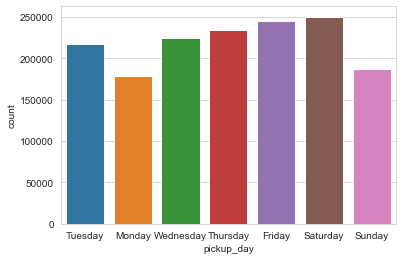

In [24]:
sns.set_style("whitegrid")
sns.countplot(x='pickup_day',data=data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='dropoff_day', ylabel='count'>

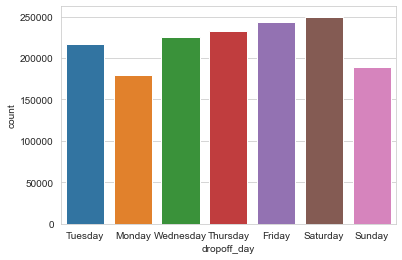

In [25]:
sns.set_style("whitegrid")
sns.countplot(x='dropoff_day',data=data)

In [26]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day,pickup_month,dropoff_month
0,2,2018-05-01 00:43:55,2018-05-01 00:56:23,N,1,80,189,5,3.67,13.5,...,0.3,19.24,1,1,2018-05-01 00:43:55,2018-05-01 00:56:23,Tuesday,Tuesday,5,5
1,2,2018-05-01 00:40:45,2018-05-01 00:45:40,N,1,97,49,1,1.14,5.5,...,0.3,8.16,1,1,2018-05-01 00:40:45,2018-05-01 00:45:40,Tuesday,Tuesday,5,5
2,1,2018-05-01 00:14:55,2018-05-01 00:22:46,N,1,7,179,1,1.50,7.5,...,0.3,8.80,1,1,2018-05-01 00:14:55,2018-05-01 00:22:46,Tuesday,Tuesday,5,5
3,1,2018-05-01 00:30:28,2018-05-01 00:47:48,N,1,7,173,1,3.60,15.0,...,0.3,16.30,2,1,2018-05-01 00:30:28,2018-05-01 00:47:48,Tuesday,Tuesday,5,5
4,1,2018-05-01 00:25:56,2018-05-01 00:45:07,N,1,256,186,1,5.40,19.0,...,0.3,22.30,1,1,2018-05-01 00:25:56,2018-05-01 00:45:07,Tuesday,Tuesday,5,5


In [27]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_month,dropoff_month
count,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06,1.536606e+06
mean,1.836116e+00,1.064452e+00,1.112909e+02,1.292130e+02,1.358079e+00,3.259950e+00,1.382517e+01,3.276253e-01,4.891488e-01,1.025544e+00,1.825947e-01,2.937648e-01,1.617187e+01,1.443950e+00,1.015524e+00,5.481235e+00,5.481756e+00
std,3.701703e-01,4.929179e-01,7.431200e+01,7.676230e+01,1.041068e+00,3.729108e+00,1.262898e+01,3.992615e-01,8.078239e-02,2.065636e+00,1.232885e+00,4.766457e-02,1.372031e+01,5.212163e-01,1.236238e-01,5.002272e-01,5.008666e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.350000e+02,-4.500000e+00,-5.000000e-01,-2.000000e+00,-6.000000e+00,-3.000000e-01,-2.350000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,5.100000e+01,6.200000e+01,1.000000e+00,1.090000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.960000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.180000e+01,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.920000e+00,1.650000e+01,5.000000e-01,5.000000e-01,1.700000e+00,0.000000e+00,3.000000e-01,1.930000e+01,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,6.211000e+02,2.703000e+03,4.500000e+00,5.000000e-01,4.500000e+02,7.650600e+02,3.000000e-01,2.704800e+03,5.000000e+00,2.000000e+00,1.200000e+01,1.200000e+01


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Dist of passenger count')

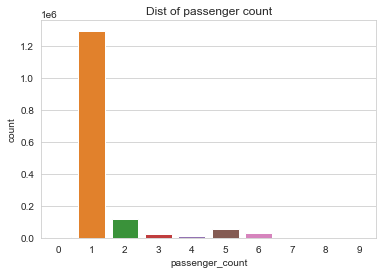

In [28]:
ax=sns.countplot(x=data['passenger_count'])
plt.title('Dist of passenger count')

#### Analysis -->  most of the passengers are travelling alone

<IPython.core.display.Javascript object>

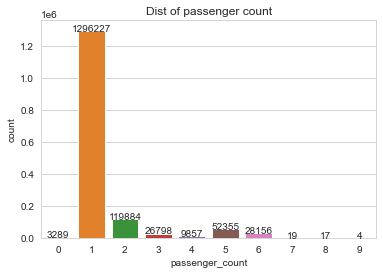

In [29]:
ax=sns.countplot(x=data['passenger_count'])
plt.title('Dist of passenger count')

for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()            
                        

                        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

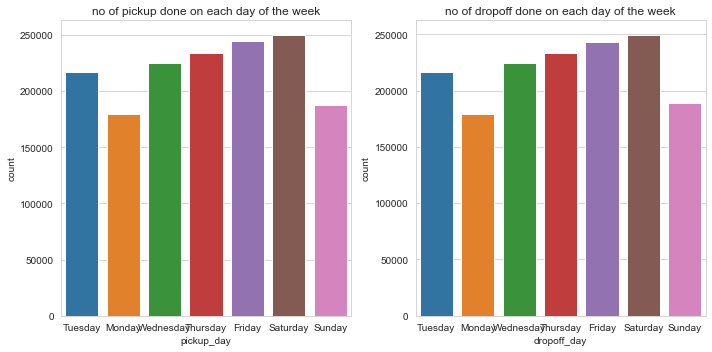

In [30]:
figure, ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_day',data=data,ax=ax[0])
ax[0].set_title('no of pickup done on each day of the week')

sns.countplot(x='dropoff_day',data=data,ax=ax[1])
ax[1].set_title('no of dropoff done on each day of the week')

plt.tight_layout()

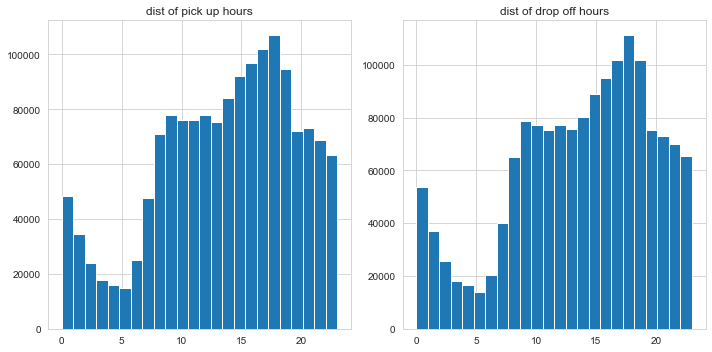

In [31]:
figure, ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

data['pickup_hour']=data['pickup_datetime'].dt.hour
data.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('dist of pick up hours')

data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('dist of drop off hours')

plt.tight_layout()

#### inference--> in evening most of pickup counts

<IPython.core.display.Javascript object>

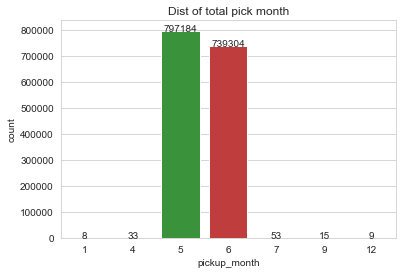

In [32]:
ax=sns.countplot(x=data['pickup_month'])
plt.title('Dist of total pick month')

for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()  

<IPython.core.display.Javascript object>

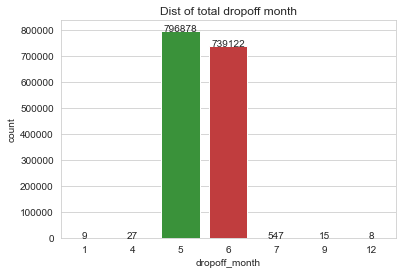

In [33]:
ax=sns.countplot(x=data['dropoff_month'])
plt.title('Dist of total dropoff month')

for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()  

<IPython.core.display.Javascript object>

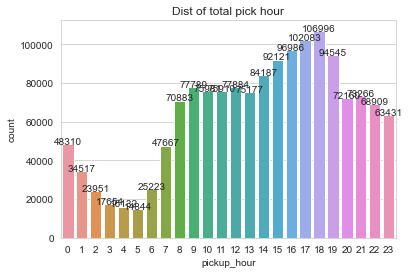

In [34]:
ax=sns.countplot(x=data['pickup_hour'])
plt.title('Dist of total pick hour')

for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()  

<IPython.core.display.Javascript object>

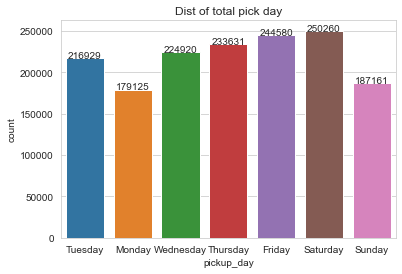

In [35]:
ax=sns.countplot(x=data['pickup_day'])
plt.title('Dist of total pick day')

for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()  

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
    max_rows_analyzed is smaller than dataset shape 1536606...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 19)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns = 

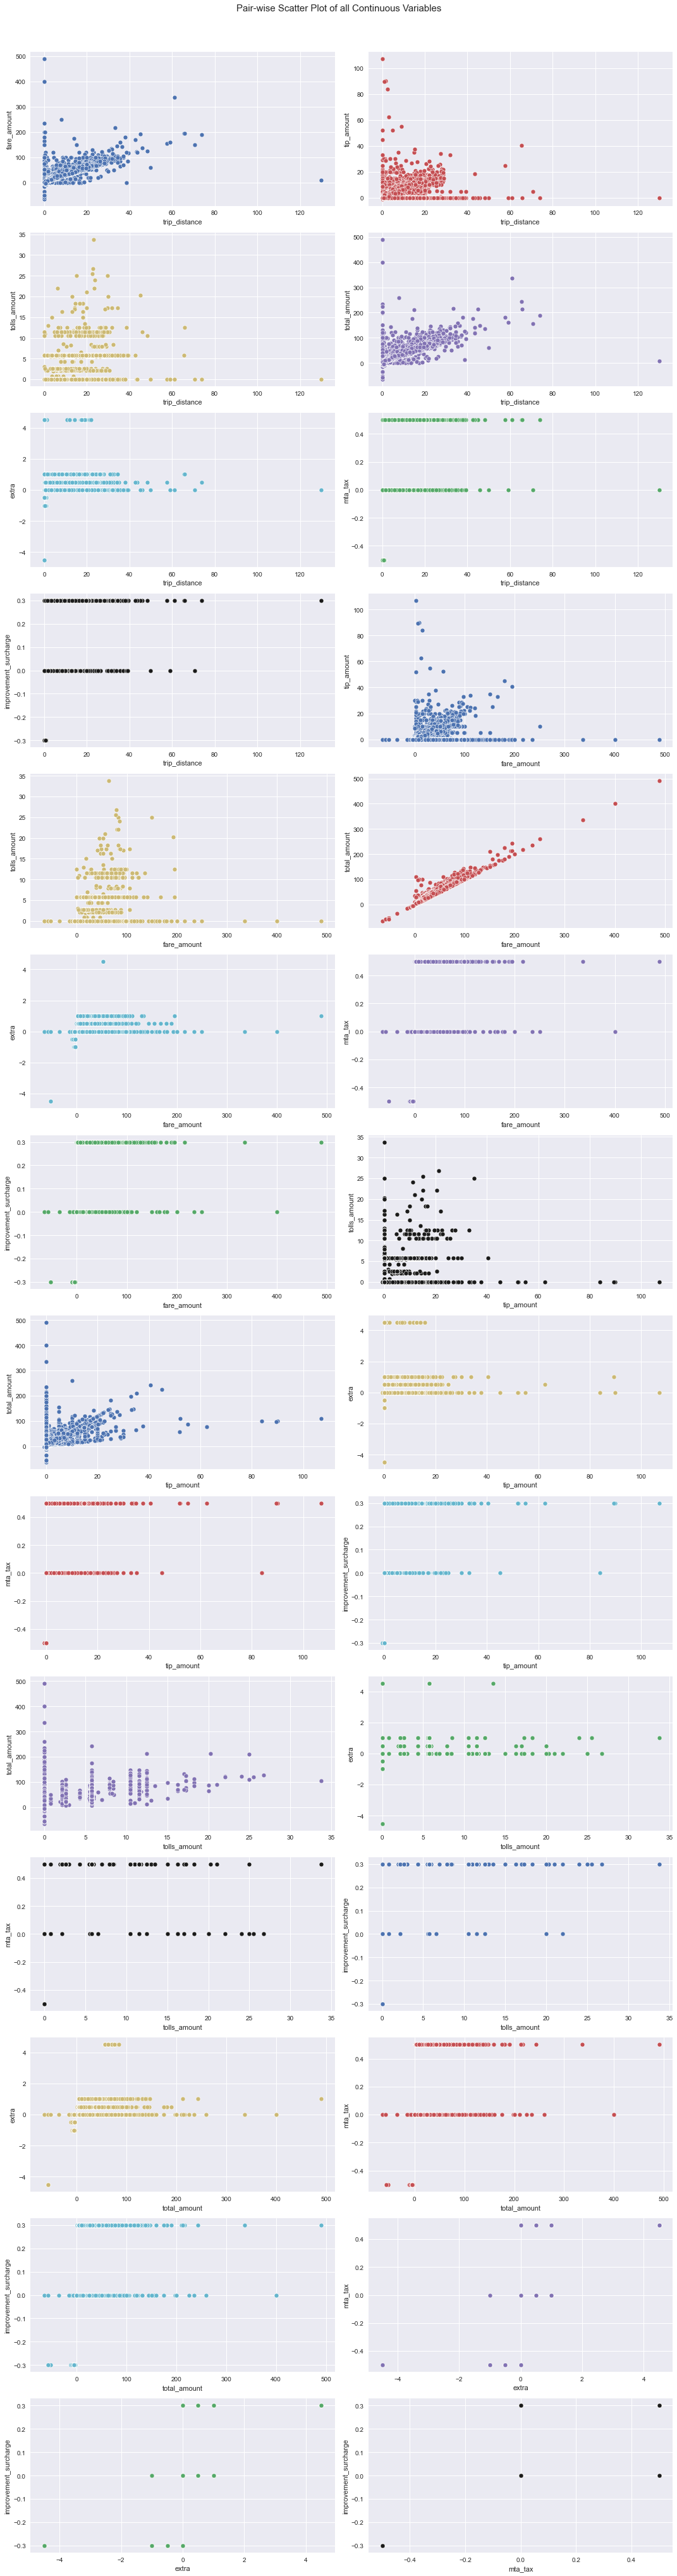

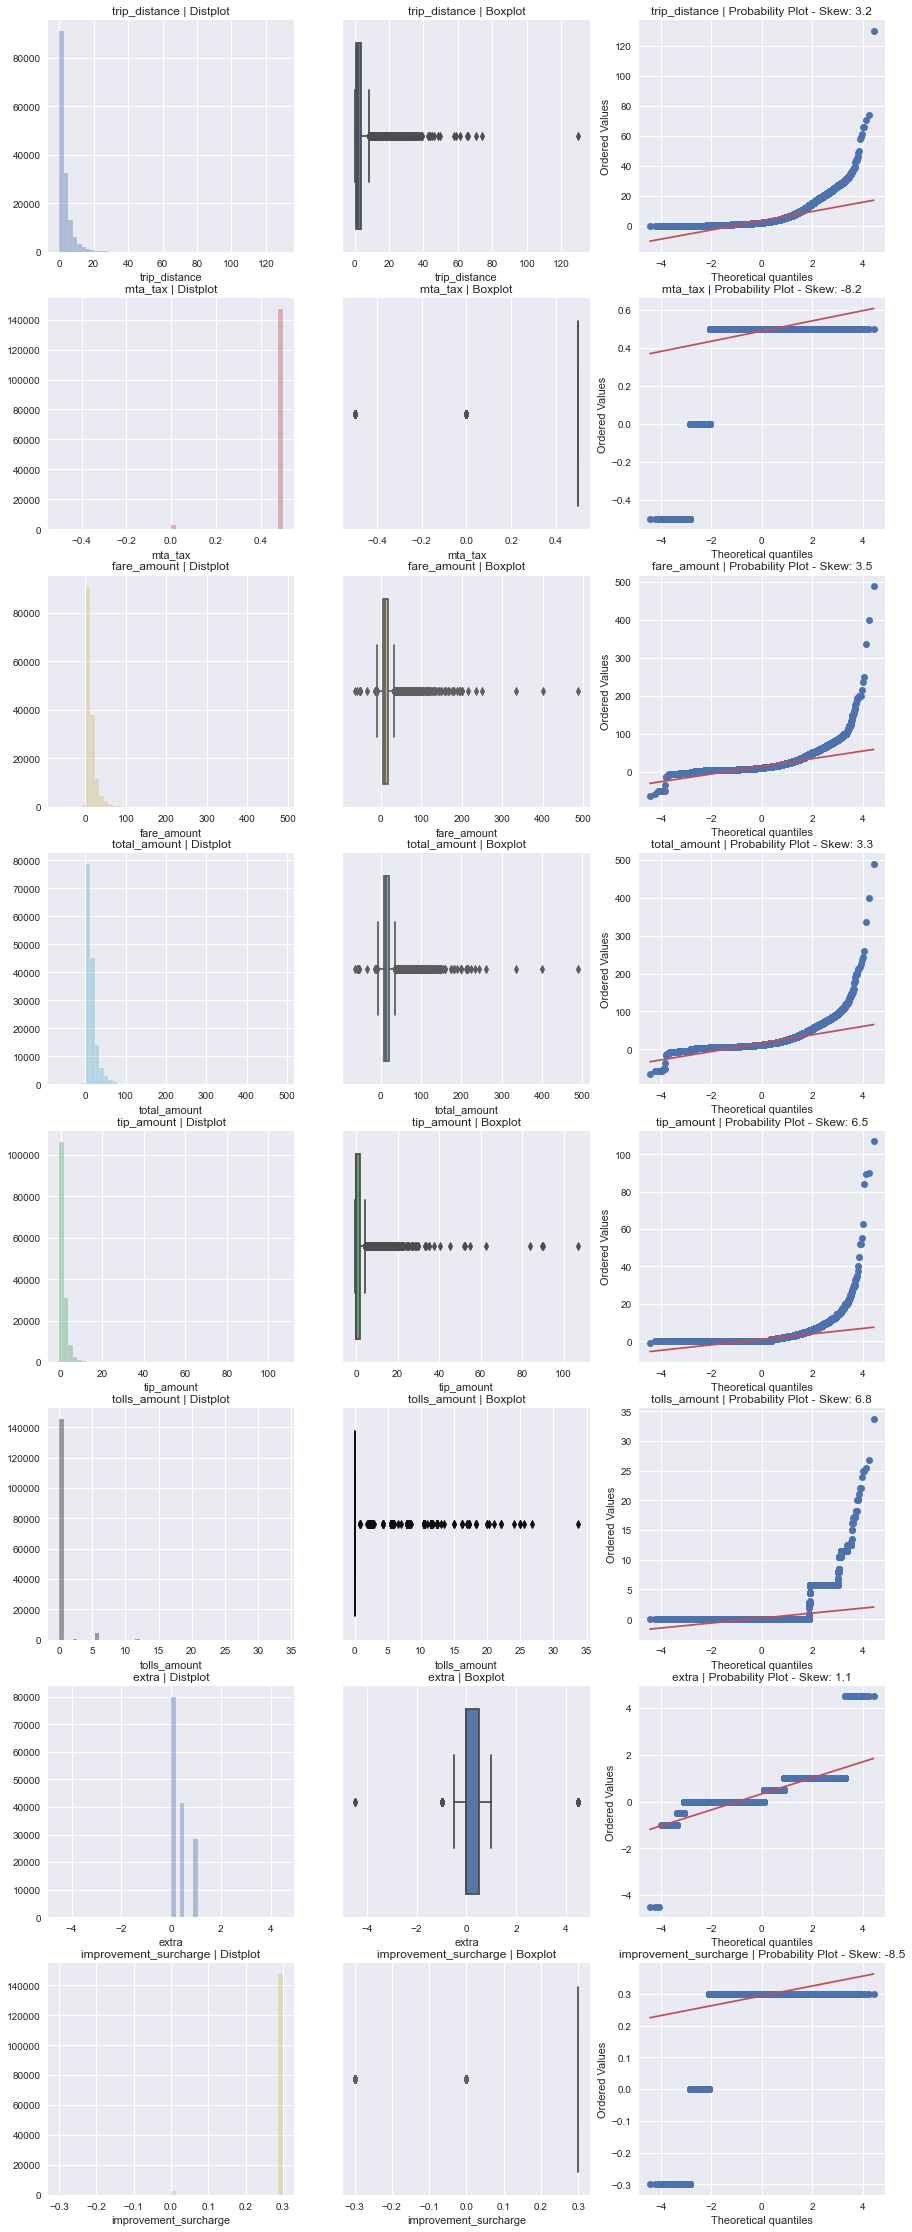

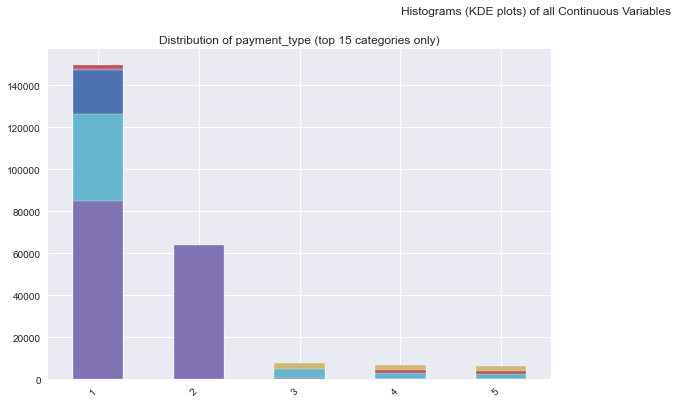

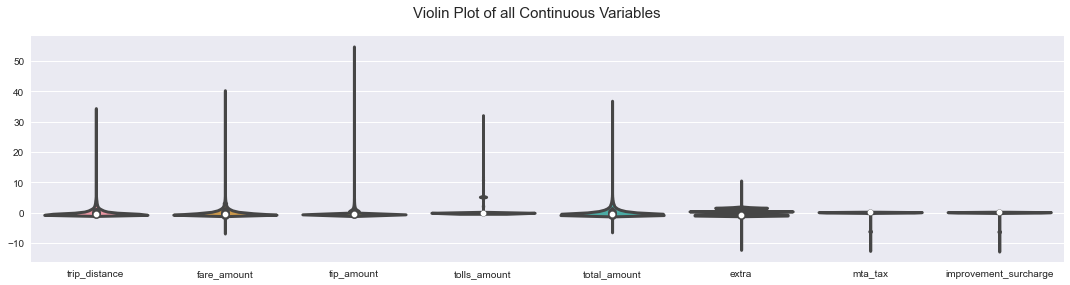

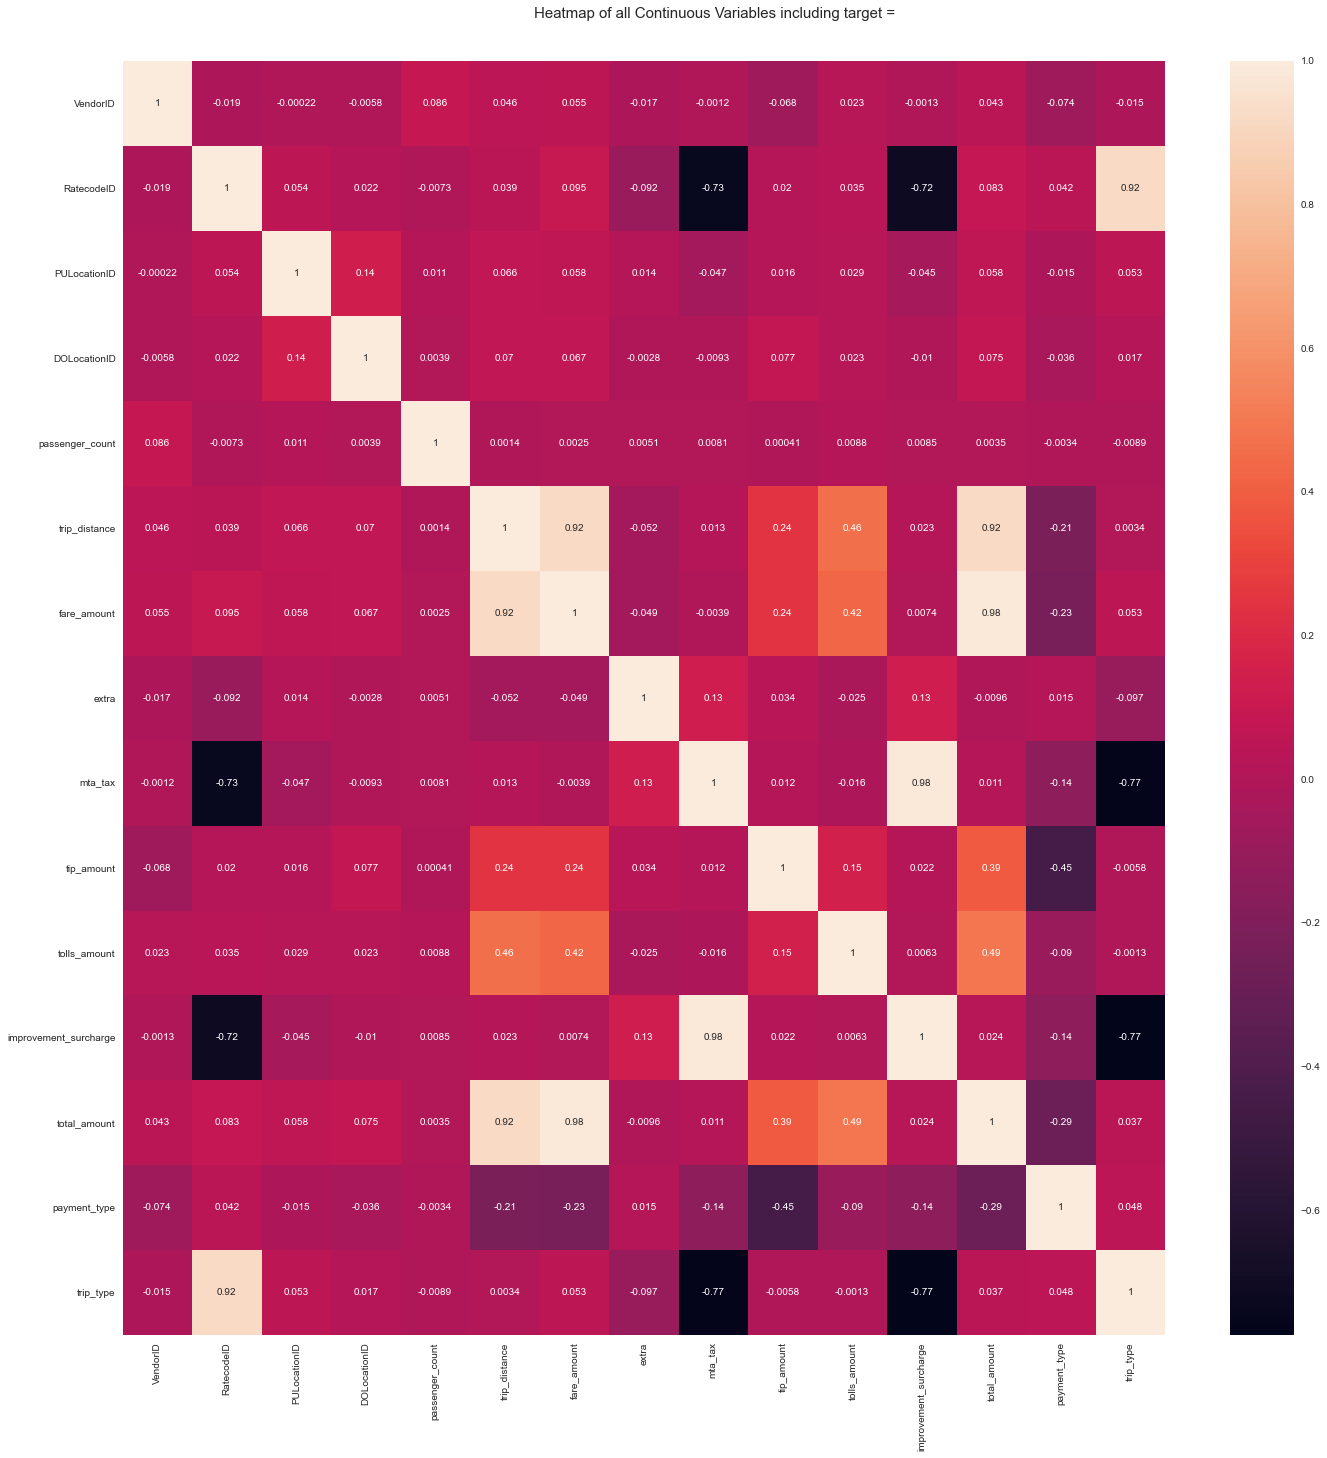

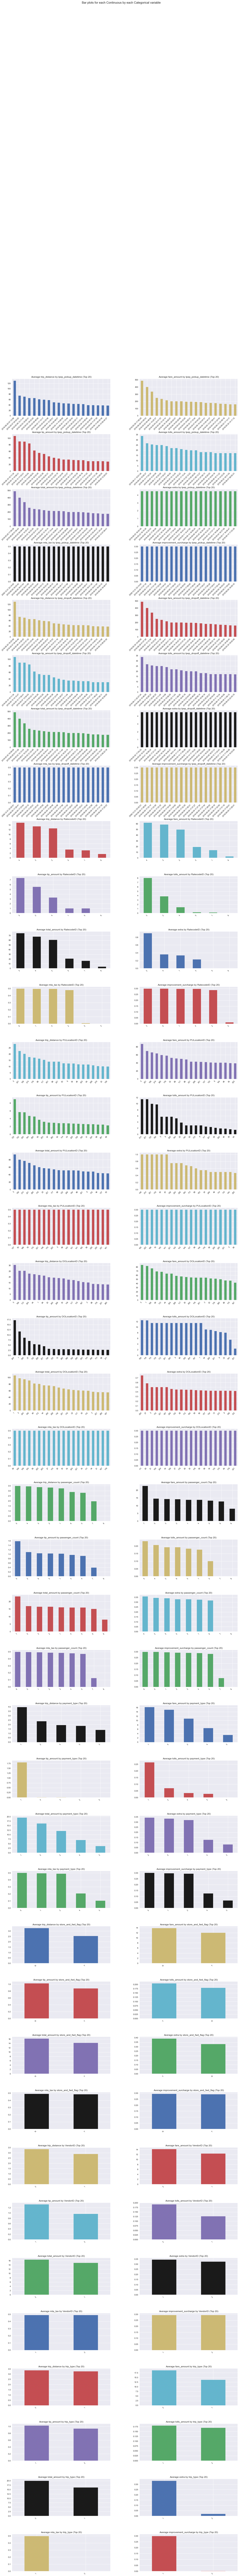

Time to run AutoViz (in seconds) = 105.496

 ###################### VISUALIZATION Completed ########################


In [36]:

from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()
filename= r'F:\Data Set\Datasets for Case study\combined_csv.csv'
dft=AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30
    )